In [13]:
sys.path.append('/Users/liushuhan/Documents/AL_GNN/Experiments/RSP/Sythentic_graph')
sys.path.append('../')
from Generator import *
from util import *
from loss import *
from Estimator import *
from cluster import *
from solver import *
import matplotlib.pyplot as plt

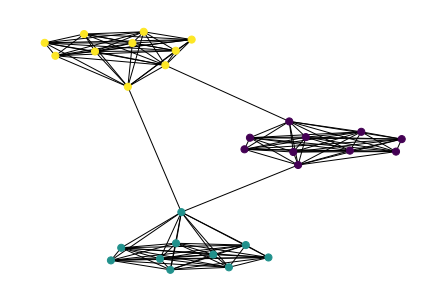

In [14]:
list_shapes = ['nx.complete_graph'] * 3
list_shapes_args = [[10]]*3
graph_type = 'nx.connected_watts_strogatz_graph'
graph_args = [3, 2, 0.4]
G, Gg, group_label, shape_label, shape_dist = synthetic_graph_generator(list_shapes, list_shapes_args, graph_type, graph_args, \
    plot=True, plot_color='group_label')
L, D, Gamma = graph_to_mat(G)
U, latent_features, node_features = noisy_feature_generator(group_label, dim_features=10, dim_latent_features=6, std=0)

In [15]:
W, loss_rec = admm_solver(Gamma, X=node_features, alpha=0.1, beta=0.1, gamma=1, epsilon=1e-8, maxiter=500)

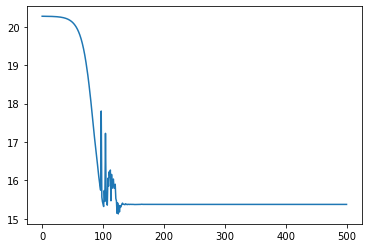

In [16]:
plt.plot(loss_rec)

<AxesSubplot:>

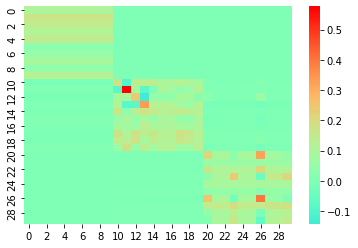

In [17]:
sb.heatmap(W, cmap='rainbow', center=0)

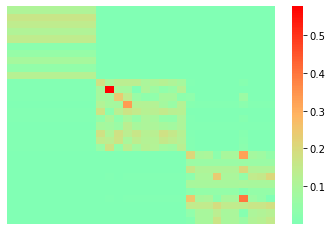

In [18]:
ase = as_El_Estimator(alpha=0.1, beta=0.1, gamma=1, Gamma=Gamma, D=D, method='admm', solver=None, deg_crct=False)
ase.fit(node_features, maxiter=500)
ase.heatplot(xticklabels=False, yticklabels=False, cbar=True)

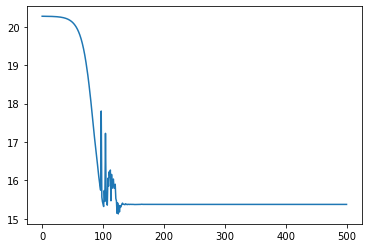

In [19]:
ase.plot_trace()